<a href="https://colab.research.google.com/github/Divyanshu451/Digit-Recognizer/blob/master/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras.datasets import mnist


11493376/11490434 [==============================] - 0s 0us/step


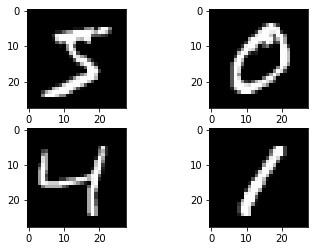

In [2]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2765 - accuracy: 0.9217 - val_loss: 0.1364 - val_accuracy: 0.9603
Epoch 2/10
300/300 - 4s - loss: 0.1103 - accuracy: 0.9678 - val_loss: 0.0955 - val_accuracy: 0.9711
Epoch 3/10
300/300 - 4s - loss: 0.0704 - accuracy: 0.9797 - val_loss: 0.0865 - val_accuracy: 0.9731
Epoch 4/10
300/300 - 4s - loss: 0.0498 - accuracy: 0.9855 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 5/10
300/300 - 4s - loss: 0.0359 - accuracy: 0.9898 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 6/10
300/300 - 4s - loss: 0.0263 - accuracy: 0.9931 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 7/10
300/300 - 4s - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0603 - val_accuracy: 0.9817
Epoch 8/10
300/300 - 4s - loss: 0.0152 - accuracy: 0.9965 - val_loss: 0.0594 - val_accuracy: 0.9823
Epoch 9/10
300/300 - 4s - loss: 0.0100 - accuracy: 0.9983 - val_loss: 0.0609 - val_accuracy: 0.9824
Epoch 10/10
300/300 - 4s - loss: 0.0077 - accuracy: 0.9986 - val_loss: 0.0638 - val_accuracy: 0.9804

In [10]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2836 - accuracy: 0.9200 - val_loss: 0.1414 - val_accuracy: 0.9583
Epoch 2/10
300/300 - 4s - loss: 0.1125 - accuracy: 0.9673 - val_loss: 0.0978 - val_accuracy: 0.9695
Epoch 3/10
300/300 - 4s - loss: 0.0710 - accuracy: 0.9793 - val_loss: 0.0847 - val_accuracy: 0.9737
Epoch 4/10
300/300 - 4s - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.0737 - val_accuracy: 0.9774
Epoch 5/10
300/300 - 4s - loss: 0.0358 - accuracy: 0.9903 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 6/10
300/300 - 4s - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.0612 - val_accuracy: 0.9801
Epoch 7/10
300/300 - 4s - loss: 0.0201 - accuracy: 0.9947 - val_loss: 0.0633 - val_accuracy: 0.9794
Epoch 8/10
300/300 - 4s - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 9/10
300/300 - 4s - loss: 0.0107 - accuracy: 0.9980 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 10/10
300/300 - 4s - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0614 - val_accuracy: 0.9817

In [11]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [13]:
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [22]:
def baseline_model2():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [23]:
model2 = baseline_model2()
# Fit the model
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model2.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 29s - loss: 0.2345 - accuracy: 0.9321 - val_loss: 0.0746 - val_accuracy: 0.9769
Epoch 2/10
300/300 - 28s - loss: 0.0696 - accuracy: 0.9796 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 3/10
300/300 - 28s - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0452 - val_accuracy: 0.9847
Epoch 4/10
300/300 - 28s - loss: 0.0395 - accuracy: 0.9877 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 5/10
300/300 - 28s - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0325 - val_accuracy: 0.9896
Epoch 6/10
300/300 - 28s - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoch 7/10
300/300 - 28s - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0274 - val_accuracy: 0.9919
Epoch 8/10
300/300 - 28s - loss: 0.0175 - accuracy: 0.9947 - val_loss: 0.0357 - val_accuracy: 0.9875
Epoch 9/10
300/300 - 28s - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0330 - val_accuracy: 0.9898
Epoch 10/10
300/300 - 28s - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.0326 - val_accura

In [24]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 35s 118ms/step - loss: 0.3833 - accuracy: 0.8823 - val_loss: 0.0931 - val_accuracy: 0.9733
Epoch 2/10
300/300 [==============================] - 35s 117ms/step - loss: 0.1023 - accuracy: 0.9683 - val_loss: 0.0561 - val_accuracy: 0.9826
Epoch 3/10
300/300 [==============================] - 35s 117ms/step - loss: 0.0761 - accuracy: 0.9765 - val_loss: 0.0467 - val_accuracy: 0.9851
Epoch 4/10
300/300 [==============================] - 35s 116ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.0361 - val_accuracy: 0.9869
Epoch 5/10
300/300 [==============================] - 35s 116ms/step - loss: 0.0549 - accuracy: 0.9827 - val_loss: 0.0387 - val_accuracy: 0.9872
Epoch 6/10
300/300 [==============================] - 35s 116ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0323 - val_accuracy: 0.9901
Epoch 7/10
300/300 [==============================] - 35s 116ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0266 - val_ac